# APPLICATIONS OF BIG DATA - HOME CREDIT DEFAULT RISK

https://www.kaggle.com/c/home-credit-default-risk/data

#### About the Data

- The application_train & application_test informe us about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. 

> The application_train dataset comes with the TARGET column indicating (0: the loan was repaid | 1: the loan was not repaid)

### LIBRARIES

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import mlflow
import mlflow.sklearn

### DATASETS

In [45]:
url_test = "C:/Users/carol/Google Drive/BIG DATA/S9/APPLICATIONS OF BIG DATA/ML_PROJECT/Data/application_test.csv"
url_train = "C:/Users/carol/Google Drive/BIG DATA/S9/APPLICATIONS OF BIG DATA/ML_PROJECT/Data/application_train.csv"

application_test = pd.read_csv(url_test)
application_train = pd.read_csv(url_train)

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
application_test.head()

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# PART 1: ML Models 

###  MANAGE MISSING VALUES

- First, I will try to know th percentage of each column and sort it by descending on application_train and application_test.
- Then I dropped columns having percent > 50

#### application_train missing values

In [48]:
#Test the application_train set
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns
    
missing_values_table_train = missing_values_table(application_train)
display(missing_values_table_train.head(10))
print("-----------------------------------------------------------------------------")
print()
print ("Your selected dataframe has " + str(application_train.shape[1]) + " columns.\n"      
            "There are " + str(missing_values_table_train.shape[0]) +
              " columns that have missing values.")

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


-----------------------------------------------------------------------------

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


In [49]:
dropped_elmt_train = missing_values_table_train[missing_values_table_train['% of Total Values'] > 50].index
application_train.drop(dropped_elmt_train, axis=1, inplace=True)

print()
print ("Your selected dataframe has now " + str(application_train.shape[1]) + " columns.\n"      
            "There are " + str(dropped_elmt_train.shape[0]) +
              " columns dropped.")


Your selected dataframe has now 81 columns.
There are 41 columns dropped.


C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
#There are more F gender in the column, so I decide to replace XNA by F gender
display(application_train['CODE_GENDER'].value_counts())
print()
print("-----------------------------------------------------------------------------")
print()
application_train['CODE_GENDER'] = application_train['CODE_GENDER'].replace('XNA', 'F')
display(application_train['CODE_GENDER'].value_counts())

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


-----------------------------------------------------------------------------



F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### application_test missing values

In [51]:
#Test the application_train set
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns
    
missing_values_table_test = missing_values_table(application_test)
display(missing_values_table_test.head(10))
print("-----------------------------------------------------------------------------")
print()
print ("Your selected dataframe has " + str(application_test.shape[1]) + " columns.\n"      
            "There are " + str(missing_values_table_test.shape[0]) +
              " columns that have missing values.")

,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


-----------------------------------------------------------------------------

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


In [52]:
dropped_elmt_test = missing_values_table_test[missing_values_table_test['% of Total Values'] > 50].index
application_test.drop(dropped_elmt_test, axis=1, inplace=True)

print()
print ("Your selected dataframe has now " + str(application_test.shape[1]) + " columns.\n"      
            "There are " + str(dropped_elmt_test.shape[0]) +
              " columns dropped.")

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Your selected dataframe has now 92 columns.
There are 29 columns dropped.


#### Align the datasets 

In [53]:
#application_train = pd.read_csv(url_train)
TARGET = application_train['TARGET']
application_train.drop('TARGET', axis=1, inplace=True)

print("Shape before align the data")
print()
print("-> Train Shape :", application_train.shape)
print("-> Test Shape :", application_test.shape)
print()
print('_____________________________________________________________________________________________')
print()
#-------------------------------------------------------------------------------
#Here, I align the train set and test to have the same columns
app_train, app_test = application_train.align(application_test, join='inner', axis=1)
app_train['TARGET'] = TARGET
print("Shape after align the data")
print()
print("-> Train Shape :", app_train.shape)
print("-> Test Shape :", app_test.shape)

Shape before align the data

-> Train Shape : (307511, 80)
-> Test Shape : (48744, 92)

_____________________________________________________________________________________________

Shape after align the data

-> Train Shape : (307511, 81)
-> Test Shape : (48744, 80)


C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Drop row missing values

In [54]:
#The result in the previous lign shows that there are some missing values in the data
#So I decide to drop row
print("Shape before removing missing values on row")
print()
print("-> Train Shape :", app_train.shape)
print("-> Test Shape :", app_test.shape)
app_train.dropna(inplace=True)
app_test.dropna(inplace=True)
print()
print('_____________________________________________________________________________________________')
print()
print("Shape after removing missing values")
print()
print("-> Train Shape :", app_train.shape)
print("-> Test Shape :", app_test.shape)

Shape before removing missing values on row

-> Train Shape : (307511, 81)
-> Test Shape : (48744, 80)

_____________________________________________________________________________________________

Shape after removing missing values

-> Train Shape : (84575, 81)
-> Test Shape : (13858, 80)


###  DATA PREPARATION & EXPLORATION

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


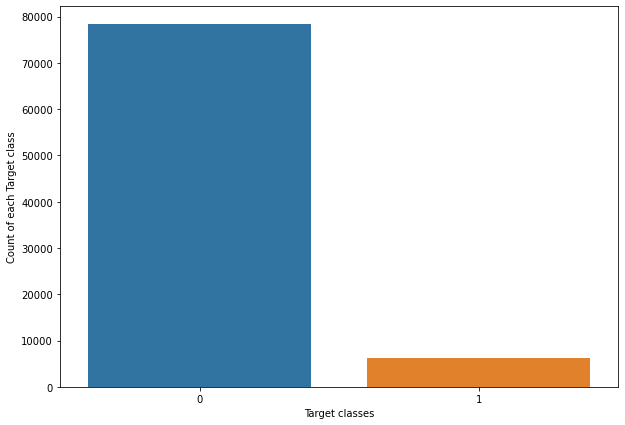

In [13]:
#First, I will take a look at the TARGET column on application_train set
target = app_train.TARGET.value_counts()

plt.figure(figsize=(10,7))
sns.countplot(x=app_train.TARGET ,data=app_train, )
plt.xlabel("Target classes")
plt.ylabel("Count of each Target class")
plt.show()

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


int64      41
float64    27
object     13
dtype: int64

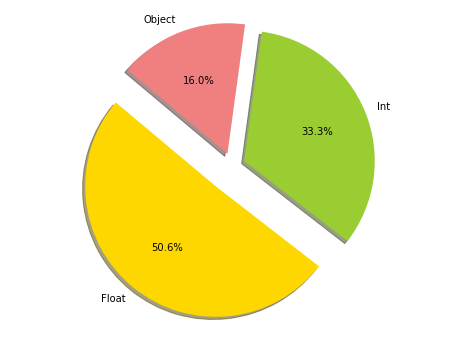

In [55]:
# Here, I will take a look at the columns types of the dataset.
t = app_train.dtypes.value_counts()
display(t)

dt = pd.DataFrame(t, columns=['values'])
dt.reset_index(drop = True, inplace = True) 

labels = ['Float', 'Int', 'Object']
sizes = dt["values"]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.2, 0.1, 0.1)  # explode 1st slicce

# Plot
plt.figure(figsize=(8,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


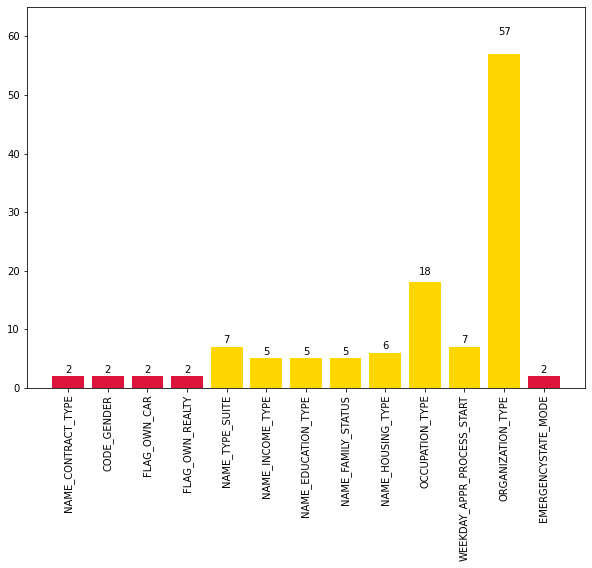

In [56]:

#I will highlight the columns
#print(application_train.select_dtypes(include=['object']))

#As we can see, there are 13,1 % of objects columns. Most Machine Learning can not deal with object type, so we need to
#do something in order to able use it .

f = app_train.select_dtypes(include=['object']).apply(pd.Series.nunique, axis = 0)
#print(f)

d = pd.DataFrame(f, columns=['values'])

fig, ax = plt.subplots(figsize=(10,7))

bar_x = [1,2,3,4,5,6,7,8,9,10,11,12,13]

bar_height = d['values']
bar_tick_label = d.index
bar_label = d['values']
bar_color = ["crimson","crimson","crimson","crimson","gold","gold",
            "gold","gold","gold","gold","gold", "gold","crimson"]
bar_plot = plt.bar(bar_x, bar_height, tick_label=bar_tick_label, color=bar_color)

def autolabel(rects):
    for idx, rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

autolabel(bar_plot)
plt.xticks(rotation=90)
plt.ylim(0, 65)
plt.show()

In [16]:
#Here, we have two categorical variables types, fisrt with 2 unique categories and the second more than 2 categories

#1. LabelEncoder
#application_train = pd.read_csv(url_train)

def LE (data):
    Label = LabelEncoder()
    
    for col in data:
        if data[col].dtype == 'object':
            if len(list(data[col].unique())) <= 2 :
                Label.fit(data[col]) 
                data[col] = Label.transform(data[col])
    return data

#2. One-Hot-encoding
def OHE(df):
    categorie_variable_column = []
    
    for col in df:
        if df[col].dtype == 'object':
            if len(list(df[col].unique())) > 2 :
                categorie_variable_column.append(col)
                
    one_hot_encoding = df.loc[:, categorie_variable_column]
    df = df.drop(categorie_variable_column, axis = 1)
    df1 = pd.get_dummies(one_hot_encoding)
    df_new = df.merge(df1, left_index=True, right_index = True)
    print("-> Shape :", df_new.shape)
    
    return df_new

In [57]:
print("Shape before the labelization")
print("-> Train shape :", app_train.shape)
print("-> Test shape :", app_test.shape)
print()
print('_____________________________________________________________________________________________')
print()
print("Shape after the labelization")
#Application train dataset
app_train_LE = LE(app_train)
app_train_ = OHE(app_train_LE)

#Application test dataset
app_test_LE = LE(app_test)
app_test_ = OHE(app_test_LE)

#As we want the train set and test to have the same columns
labels = app_train_['TARGET']

app_train, app_test = app_train_.align(app_test_, join='inner', axis=1)
app_train['TARGET'] = labels
print()
print('_____________________________________________________________________________________________')
print()
print("Shape after align the datasets to have the same columns")
print("-> Train shape :", app_train.shape)
print("-> Test shape :", app_test.shape)


Shape before the labelization
-> Train shape : (84575, 81)
-> Test shape : (13858, 80)

_____________________________________________________________________________________________

Shape after the labelization
-> Shape : (84575, 183)
-> Shape : (13858, 179)

_____________________________________________________________________________________________

Shape after align the datasets to have the same columns
-> Train shape : (84575, 180)
-> Test shape : (13858, 179)


### MODELS

In [18]:
from sklearn.model_selection import train_test_split

X = app_train.drop('TARGET', axis=1)
y = app_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=42)

#### XgBoost

In [58]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model_xgb = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.1, subsample=0.5)
train_model_xgb = model_xgb.fit(X_train, y_train)

prediction_xgb = train_model_xgb.predict(X_test)

#Let's print the report.

print('Model XGboost Report')
print()
print(classification_report(y_test, prediction_xgb))
print()
print('_____________________________________________________________________________________________')
print()
#Let's use accuracy score

print("Accuracy for model : %.2f" % (accuracy_score(y_test, prediction_xgb) * 100), "%")

Model XGboost Report

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15660
           1       0.62      0.00      0.01      1255

    accuracy                           0.93     16915
   macro avg       0.78      0.50      0.48     16915
weighted avg       0.90      0.93      0.89     16915


_____________________________________________________________________________________________

Accuracy for model : 92.59 %


#### Random Forest 

In [59]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
train_model_rfc = model_rfc.fit(X_train, y_train)

prediction_rfc = train_model_rfc.predict(X_test)

In [60]:
print('Model Random Forest Report')
print()
print(classification_report(y_test, prediction_rfc))
print()
print('_____________________________________________________________________________________________')
print()
#Let's use accuracy score

print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test, prediction_rfc) * 100), "%")

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model Random Forest Report

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15660
           1       0.00      0.00      0.00      1255

    accuracy                           0.93     16915
   macro avg       0.46      0.50      0.48     16915
weighted avg       0.86      0.93      0.89     16915


_____________________________________________________________________________________________

Accuracy for Random Forest Model: 92.58 %


#### Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbc = GradientBoostingClassifier()
train_model_gbc = model_gbc.fit(X_train, y_train)

prediction_gbc = train_model_gbc.predict(X_test)

In [62]:
print('Model Gradient Boosting Report')
print()
print(classification_report(y_test, prediction_gbc))
print()
print('_____________________________________________________________________________________________')
print()
#Let's use accuracy score

print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test, prediction_gbc) * 100), "%")

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model Gradient Boosting Report

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15660
           1       0.54      0.01      0.02      1255

    accuracy                           0.93     16915
   macro avg       0.73      0.51      0.49     16915
weighted avg       0.90      0.93      0.89     16915


_____________________________________________________________________________________________

Accuracy for Random Forest Model: 92.59 %


# PART 2: MLFlow

http://localhost:5000.

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_metrics(actual, pred):
        rmse = np.sqrt(mean_squared_error(actual, pred)) * 100
        mae = mean_absolute_error(actual, pred) * 100
        r2 = r2_score(actual, pred) * 100
        return rmse, mae, r2 

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### XGBoost

In [79]:
import mlflow.xgboost

    
if __name__ == "__main__":
    # enable auto logging
    mlflow.xgboost.autolog()
    
    #mlflow.end_run()
    
    with mlflow.start_run():
        
        model_xgb_mlflow = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.1, subsample=0.5)
        train_model_xgb_mlflow = model_xgb_mlflow.fit(X_train, y_train)
        
        #Evaluation model
        prediction_xgb_mlflow = train_model_xgb_mlflow.predict(X_test)
        (rmse_xgb, mae_xgb, r2_xgb) = eval_metrics(y_test, prediction_xgb_mlflow)
        acc_xgb = accuracy_score(y_test, prediction_xgb_mlflow) * 100
        
        # Print out metrics
        print("Metrics for XGBoost:" )
        print("_______________")
        print("| RMSE | %1.1f%% |" % rmse_xgb)
        print("_______________")
        print("| MAE  | %1.1f%%  |" % mae_xgb)
        print("_______________")
        print("| R2   | %1.1f%% |" % r2_xgb)
        print("_______________")
        print("| ACC  | %1.1f%% |" % acc_xgb)
        print("_______________")
        print()
        
        # Log parameter, metrics, and model to MLflow
        mlflow.log_metric("rmse", rmse_xgb)
        mlflow.log_metric("r2", r2_xgb)
        mlflow.log_metric("mae", mae_xgb)
        mlflow.log_metric("acc", acc_xgb)
        
        
        mlflow.sklearn.log_model(model_xgb_mlflow, "model")
        print("Model saved in run %s" % mlflow.active_run().info.run_uuid)
        

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Metrics for XGBoost:
_______________
| RMSE | 27.2% |
_______________
| MAE  | 7.4%  |
_______________
| R2   | -7.8% |
_______________
| ACC  | 92.6% |
_______________

Model saved in run cfb3cbd82c264b069dd43c02c5ab07aa


#### Random Forest 

In [81]:
from sklearn.ensemble import RandomForestClassifier
import mlflow

    
if __name__ == "__main__":
    # enable auto logging
    mlflow.sklearn.autolog()
    
    #mlflow.end_run()
    
    with mlflow.start_run():
        
        model_rdf_mlflow =RandomForestClassifier()
        train_model_rdf_mlflow = model_rdf_mlflow.fit(X_train, y_train)
        
        #Evaluation model
        prediction_rdf_mlflow = train_model_rdf_mlflow.predict(X_test)
        (rmse_rdf, mae_rdf, r2_rdf) = eval_metrics(y_test, prediction_rdf_mlflow)
        acc_rdf = accuracy_score(y_test, prediction_rdf_mlflow) * 100
        
        # Print out metrics
        print("Metrics for Random Forest:" )
        print("_______________")
        print("| RMSE | %1.1f%% |" % rmse_rdf)
        print("_______________")
        print("| MAE  | %1.1f%%  |" % mae_rdf)
        print("_______________")
        print("| R2   | %1.1f%% |" % r2_rdf)
        print("_______________")
        print("| ACC  | %1.1f%% |" % acc_rdf)
        print("_______________")
        print()
        
        # Log parameter, metrics, and model to MLflow
        mlflow.log_metric("rmse", rmse_rdf)
        mlflow.log_metric("r2", r2_rdf)
        mlflow.log_metric("mae", mae_rdf)
        mlflow.log_metric("acc", acc_rdf)
        
        
        mlflow.sklearn.log_model(model_rdf_mlflow, "model")
        print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

C:\Users\carol\anaconda3\envs\ML_conda_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Metrics for Random Forest:
_______________
| RMSE | 27.2% |
_______________
| MAE  | 7.4%  |
_______________
| R2   | -8.0% |
_______________
| ACC  | 92.6% |
_______________

Model saved in run 189fa4243eb947f7a7da2ae550e771cf


#### Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
import mlflow

    
if __name__ == "__main__":
    # enable auto logging
    mlflow.sklearn.autolog()
    
    #mlflow.end_run()
    
    with mlflow.start_run():
        
        model_gbc_mlflow =GradientBoostingClassifier()
        train_model_gbc_mlflow = model_gbc_mlflow.fit(X_train, y_train)
        
        #Evaluation model
        prediction_gbc_mlflow = train_model_gbc_mlflow.predict(X_test)
        (rmse_gbc, mae_gbc, r2_gbc) = eval_metrics(y_test, prediction_rdf_mlflow)
        acc_gbc = accuracy_score(y_test, prediction_gbc_mlflow) * 100
        
        # Print out metrics
        
        print("Metrics for Gradient Boosting:" )
        print("_______________")
        print("| RMSE | %1.1f%% |" % rmse_gbc)
        print("_______________")
        print("| MAE  | %1.1f%%  |" % mae_gbc)
        print("_______________")
        print("| R2   | %1.1f%% |" % r2_gbc)
        print("_______________")
        print("| ACC  | %1.1f%% |" % acc_gbc)
        print("_______________")
        print()
        
        # Log parameter, metrics, and model to MLflow
        mlflow.log_metric("rmse", rmse_gbc)
        mlflow.log_metric("r2", r2_gbc)
        mlflow.log_metric("mae", mae_gbc)
        mlflow.log_metric("acc", acc_gbc)
        
        
        mlflow.sklearn.log_model(model_rdf_mlflow, "model")
        print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

Metrics for Gradient Boosting:
_______________
| RMSE | 27.2% |
_______________
| MAE  | 7.4%  |
_______________
| R2   | -8.0% |
_______________
| ACC  | 92.6% |
_______________

Model saved in run d52c814744f64363b676dc93667d5677


# PART 3: XAI with LIME Method